In [1]:
# pip install kaggle --upgrade

In [2]:
# ! pip show kaggle

In [3]:
!kaggle config view

Configuration values from C:\Users\PC\.kaggle
- username: heyggun
- path: None
- proxy: None
- competition: None


In [4]:
# titanic 경진대회 파일 다운로드

# !kaggle competitions download -c titanic

In [5]:
import os 
os.listdir()

['.ipynb_checkpoints', 'Hyper Parameter Test.ipynb', 'titanic', 'titanic.zip']

In [6]:
# import shutil

# filename = 'titanic.zip' # 압축 해제할 파일 이름
# extrac_dir = 'titanic' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태

# shutil.unpack_archive(filename, extrac_dir, archive_format)

In [7]:
os.listdir()

['.ipynb_checkpoints', 'Hyper Parameter Test.ipynb', 'titanic', 'titanic.zip']

In [8]:
os.listdir('titanic/')

['gender_submission.csv', 'test.csv', 'train.csv']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 
import warnings
warnings.filterwarnings('ignore')

In [10]:
plt.rcParams["font.family"] = 'Malgun Gothic'

In [11]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----

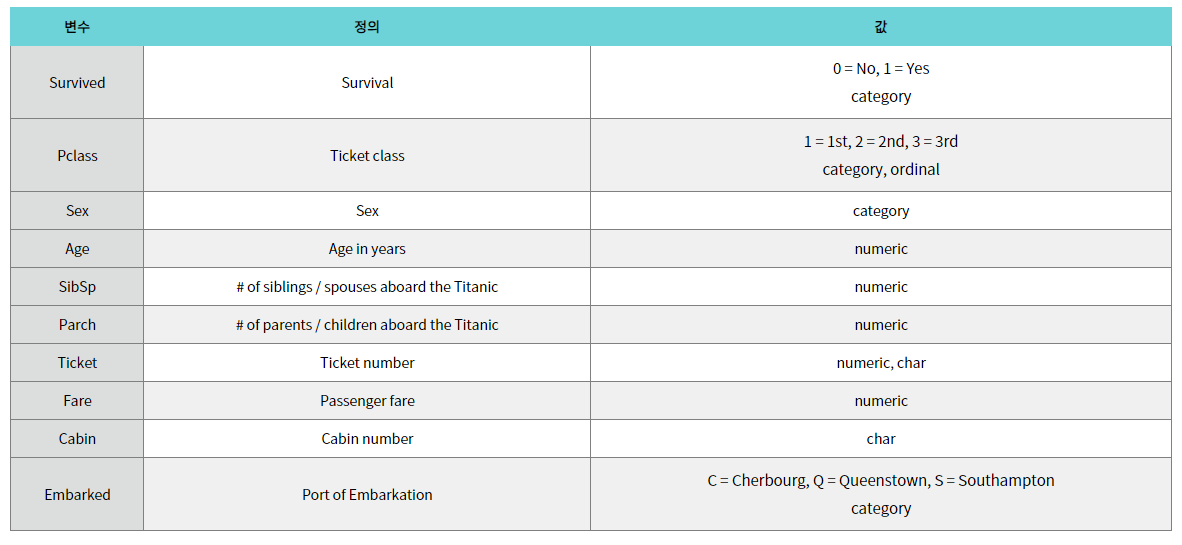

-----

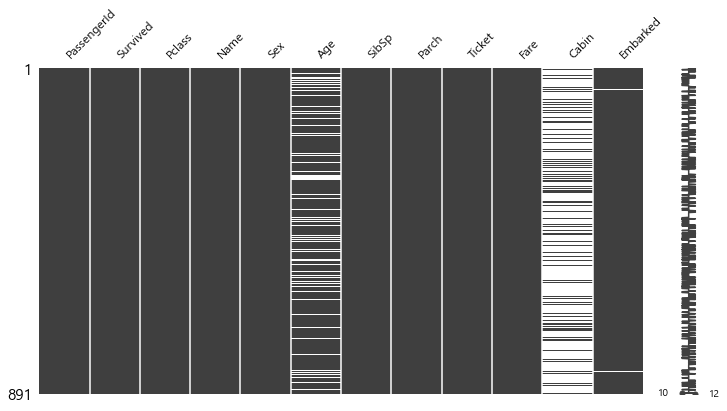

In [16]:
msno.matrix(train, figsize=(12,6), fontsize=12);

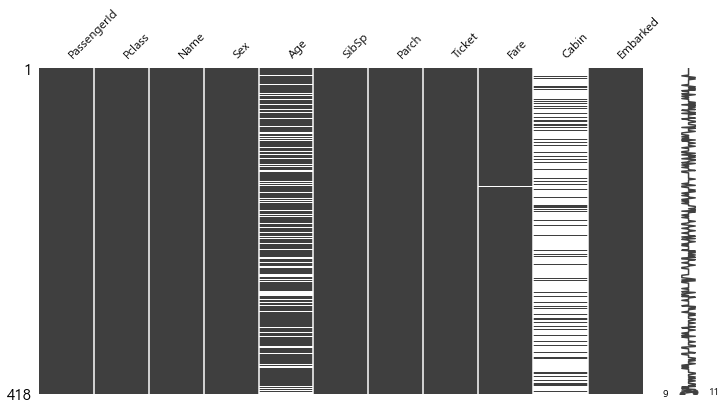

In [17]:
msno.matrix(test, figsize=(12,6), fontsize=12);

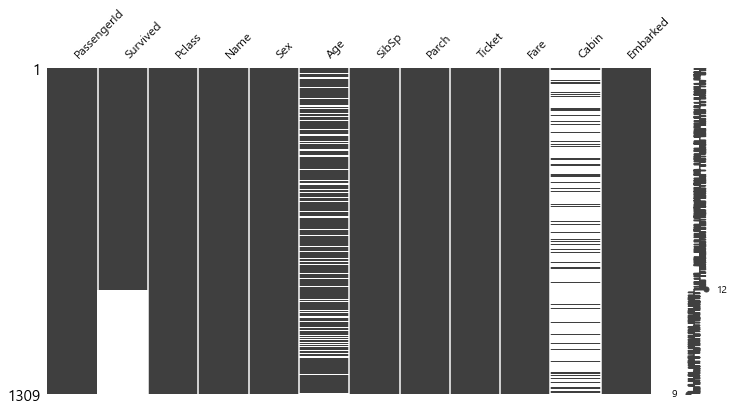

In [18]:
msno.matrix(pd.concat([train,test]), figsize=(12,6), fontsize=12);

In [19]:
for idx, row in enumerate(train):
    print(row)
    print(train[row].value_counts())
    print('---')

PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
---
Survived
0    549
1    342
Name: Survived, dtype: int64
---
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
---
Name
Roebling, Mr. Washington Augustus II           1
Rouse, Mr. Richard Henry                       1
Ryerson, Miss. Susan Parker "Suzette"          1
Newell, Miss. Marjorie                         1
Clarke, Mrs. Charles V (Ada Maria Winfield)    1
                                              ..
Fynney, Mr. Joseph J                           1
Homer, Mr. Harry ("Mr E Haven")                1
Mullens, Miss. Katherine "Katie"               1
Coutts, Master. Eden Leslie "Neville"          1
Hedman, Mr. Oskar Arvid                        1
Name: Name, Length: 891, dtype: int64
---
Sex
male      577
female    314
Name: Sex, dtype: int64
---
Age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
     

-> `name`, `ticket`, `Cabin` feature 제거

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*각 feature가 분류 분석에 미칠 영향에 대해서 탐색*
- data를 group별로 나누어 feature 간 그룹 차이 탐색

0    549
1    342
Name: Survived, dtype: int64


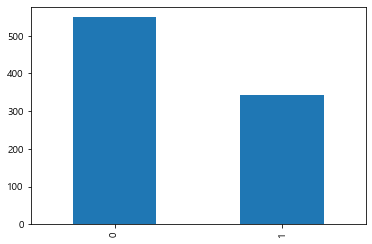

In [21]:
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind='bar');

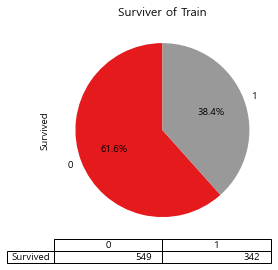

In [22]:
train['Survived'].value_counts().plot.pie(autopct='%.1f%%', cmap='Set1', startangle=90, table=True, title = 'Surviver of Train');

Survived Feature -> 0 - 사망, 1 - 생존

3    491
1    216
2    184
Name: Pclass, dtype: int64


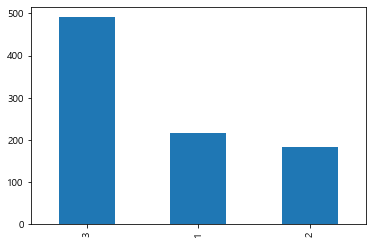

In [23]:
print(train['Pclass'].value_counts())
train['Pclass'].value_counts().plot(kind='bar');

In [24]:
train.groupby(['Pclass','Survived']).count()[['PassengerId']]

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

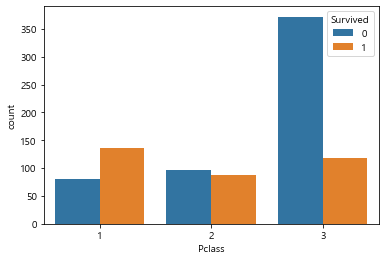

In [25]:
# Survived feature를 기준으로 그룹별 Pclass feature 분포 확인

ax = sns.countplot(x='Pclass', hue='Survived', data=train)

`수치형 feature 들에 대한 탐색`
- 두 그룹 간의 분포를 비교
- 두 그룹 간의 각각의 표준편차 출력
- 두 그룹 간의 T-test 검정을 실시하여 출력
- 두 그룹 각각의 Shapiro-wilk 검정 실시

In [26]:
from scipy import stats

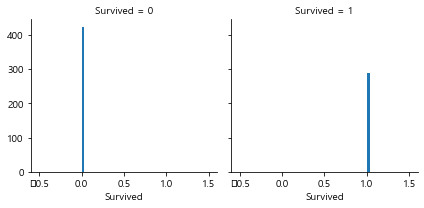

In [27]:
g = sns.FacetGrid(train[train['Age']>0], col='Survived')
g.map(plt.hist, 'Survived', bins=30);

In [28]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

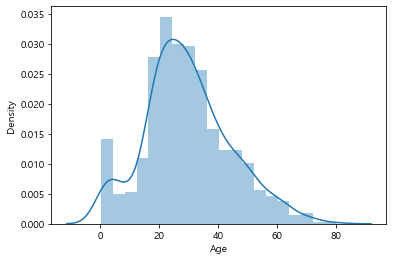

In [29]:
sns.distplot(train[train['Age']>0]['Age']);

In [30]:
train_df = train.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], axis=1)
test_df = test.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1)

In [31]:
train_df['Age'] = train_df['Age'].fillna(train_df[train_df['Age']>0].mean())
test_df['Age'] = test_df['Age'].fillna(test_df[test_df['Age']>0].mean())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].value_counts().index[0])
test_df['Embakred'] = test_df['Embarked'].fillna(test_df['Embarked'].value_counts().index[0])

In [32]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [33]:
train_df = pd.get_dummies(train_df, columns=['Pclass','Sex','Embarked'])
test_df = pd.get_dummies(test_df, columns =['Pclass','Sex','Embarked'])

In [34]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [35]:
train_df.shape[1]

13

In [36]:
test_df.head()

,Age,SibSp,Parch,Fare,Embakred,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,Q,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,S,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


In [37]:
test_df.drop(columns=['Embakred'],inplace=True)

# 모델링

- logistic regression
- xgboost
- decision Tree

#### **xgboost**

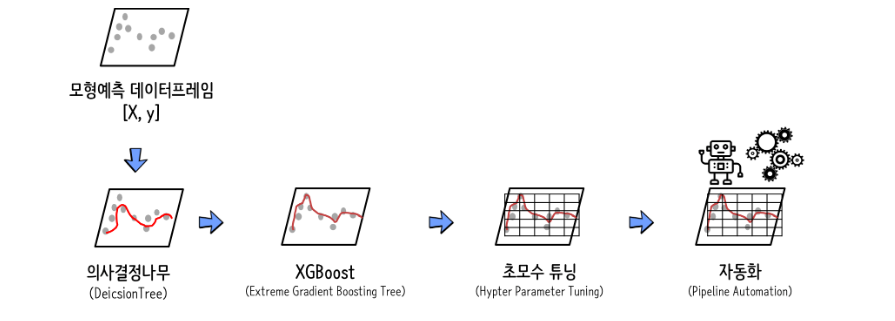

In [38]:
import xgboost as xgb

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [40]:
X, y = train_df.drop(columns=['Survived']), train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)
xg_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators=20, seed=1234)
xg_cl.fit(X_train, y_train)

[17:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=20, n_jobs=12,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1234, subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

In [41]:
# 예측

preds= xg_cl.predict(X_test)

# 정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print('accuracy: %f' % (accuracy))

accuracy: 0.835821


C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
test_df.reset_index()['index']

0        0
1        1
2        2
3        3
4        4
      ... 
413    413
414    414
415    415
416    416
417    417
Name: index, Length: 418, dtype: int64

In [43]:
y_pred = xg_cl.predict(test_df)
result = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived_pred':y_pred})
result

C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,PassengerId,Survived_pred
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


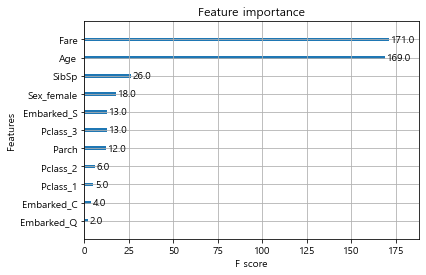

In [45]:
xgb.plot_importance(xg_cl);

# Hyperparameter Tuning

- Grid Search
- Random Search
- Bayesian Search

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [48]:
import xgboost as xgb
xgb.set_config(verbosity=0)

X,y = train_df.drop(columns='Survived'), train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

params = {
    'min_child_weight' : [1, 3, 5, 6, 10],
    'gamma' : [0.5, 1, 1.5, 2, 3, 4, 5],
    'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth' : [3, 4, 5, 6],
}

xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent =True,
                        nthread=1,eval_metric='mlogloss')

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state=1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, 
                                  cv=skf.split(X_train, y_train), verbose=3, random_state=1234)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    4.8s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001D20223DD00>,
          error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='mlogloss', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=0.02, ...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 3, 5, 6, 10], 'gamma': [0.5, 1, 1.5, 2, 3, 4, 5], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [49]:
random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 1,
 'max_depth': 6,
 'gamma': 3,
 'colsample_bytree': 1.0}

In [50]:
# 예측하기

preds = random_search.predict(X_test)

# 정확도

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print('accuracy: %f' % (accuracy))

accuracy: 0.837989


C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



-----

### hyper parameter tuning : GridSearchCV 테스트

In [51]:
from sklearn.model_selection import KFold, GridSearchCV
import xgboost as xgb
xgb.set_config(verbosity=0)

X,y = train_df.drop(columns='Survived'), train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent =True,
                        nthread=1,eval_metric='mlogloss')

param_grid = {
    'min_child_weight' : [1, 3, 5, 6, 10],
    'gamma' : [0.5, 1, 1.5, 2, 3, 4, 5],
    'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth' : [3, 4, 5, 6],
}


cv = KFold(n_splits=3, shuffle=True, random_state=1234)

grid_search = GridSearchCV(model, param_grid= param_grid, scoring='roc_auc', n_jobs=4, cv=cv, verbose=3)

grid_search.fit(X_train.values, y_train.values)

Fitting 3 folds for each of 3500 candidates, totalling 10500 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   52.5s
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 8184 tasks      | elapsed:  9.0min
[Parallel(n_j

GridSearchCV(cv=KFold(n_splits=3, random_state=1234, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='mlogloss', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=0.02, ...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'min_child_weight': [1, 3, 5, 6, 10], 'gamma': [0.5, 1, 1.5, 2, 3, 4, 5], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

In [52]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): print(np.sqrt(-mean_score), params)

nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.9}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.6}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.9}
nan {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 3, 'subsamp

nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.7}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.8}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.9}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 1.0}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.7}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.9}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0}
nan {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 6, 'subsample': 0.6}
nan {'cols

In [53]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 3,
 'max_depth': 6,
 'min_child_weight': 1,
 'subsample': 1.0}

In [54]:
grid_search.best_score_

0.8691512996403211

In [55]:
preds = grid_search.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print('accuracy: %f' % (accuracy))

accuracy: 0.854749


C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


참고 :
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gustn3964&logNo=221431933811

### hyper parameter tuning : RandomizedSearchCV 테스트

In [56]:
from sklearn.model_selection import KFold, RandomizedSearchCV
import xgboost as xgb
xgb.set_config(verbosity=0)

X,y = train_df.drop(columns='Survived'), train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent =True,
                        nthread=1,eval_metric='mlogloss')

param_random = {
    'min_child_weight' : [1, 3, 5, 6, 10], 
    'gamma': [0.5, 1, 1.5, 2, 3, 4, 5], 
    'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth' : [ 3, 4, 5, 6],
}


cv = KFold(n_splits=3, shuffle=True, random_state=1234)

random_search = RandomizedSearchCV(model, param_distributions= param_random, scoring='roc_auc', n_jobs=4, cv=cv, verbose=3)
random_search.fit(X_train.values, y_train.values)

In [62]:
cvres = random_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}
nan {'subsample': 0.9, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 0.5, 'colsample_bytree': 0.7}
nan {'subsample': 0.9, 'min_child_weight': 6, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 0.7}
nan {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 1.0}
nan {'subsample': 0.7, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 3, 'colsample_bytree': 1.0}


In [58]:
random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 1,
 'max_depth': 6,
 'gamma': 3,
 'colsample_bytree': 1.0}

In [63]:
# 예측하기

preds = random_search.predict(X_test)

# 정확도
accuracy = float(np.sum(preds==y_test)) / y_test.shape[0]
print('accuracy: %f' % (accuracy))

accuracy: 0.837989


C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### hyper parameter tuning : bayesian-optimization 테스트

In [65]:
# !pip install bayesian-optimization

In [68]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
import xgboost as xgb

xgb.set_config(verbosity=0)

X,y = train_df.drop(columns='Survived'), train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent =True,
                        nthread=1,eval_metric='mlogloss')

In [72]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}  

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [70]:
# pbound = {
#      'max_depth': [3, 4, 5, 6],
#      'gamma': [],
#      'min_child_weight': [1, 3, 5, 6, 10],
#      'max_delta_step': [0, 10],
#      'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#      'colsample_bytree' :[0.6, 0.7, 0.8, 0.9, 1.0]}